In [44]:
import gensim
REPO_HOME = '/Users/jonathansimon/code/what-do-you-call-a-bot/'
MAX_WORDS = 300000
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(REPO_HOME+'data/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=MAX_WORDS)

In [3]:
zip(*word2vec_model.most_similar(positive=['dog'], topn=10))[0]

(u'dogs',
 u'puppy',
 u'pit_bull',
 u'pooch',
 u'cat',
 u'golden_retriever',
 u'German_shepherd',
 u'Rottweiler',
 u'beagle',
 u'pup')

In [45]:
def get_neighbors(grapheme, k=10):
    neighbors = list(zip(*word2vec_model.most_similar(positive=[grapheme], topn=k))[0])
    neighbor_inds = [word2vec_model.vocab[neighbor].index for neighbor in neighbors]
    return zip(neighbors, neighbor_inds)

In [13]:
get_neighbors('leek')

[(u'leeks', 87372),
 (u'parsnips', 145203),
 (u'fennel', 73660),
 (u'courgette', 352667),
 (u'celeriac', 257327),
 (u'Savoy_cabbage', 740908),
 (u'cabbage', 30049),
 (u'parsley', 47712),
 (u'shallots', 96723),
 (u'salsify', 446577)]

In [14]:
get_neighbors('dachshund')

[(u'Pomeranian', 131629),
 (u'golden_retriever', 63417),
 (u'beagle', 70277),
 (u'Dachshund', 200869),
 (u'border_collie', 102761),
 (u'Shih_Tzu', 132291),
 (u'basset_hound', 185369),
 (u'dog', 2043),
 (u'cocker_spaniel', 115968),
 (u'poodle_mix', 644691)]

In [17]:
get_neighbors('cat')

[(u'cats', 7107),
 (u'dog', 2043),
 (u'kitten', 30416),
 (u'feline', 40079),
 (u'beagle', 70277),
 (u'puppy', 16503),
 (u'pup', 38961),
 (u'pet', 4804),
 (u'felines', 72606),
 (u'chihuahua', 130539)]

In [19]:
get_neighbors('mastodon')

[(u'woolly_mammoth', 165995),
 (u'wooly_mammoth', 467538),
 (u'mastodons', 240085),
 (u'triceratops', 305100),
 (u'dinosaur', 24173),
 (u'Columbian_mammoths', 893101),
 (u'mastodon_bones', 937844),
 (u'Diplodocus', 549561),
 (u'mastodon_tusk', 1730834),
 (u'fossils', 28475)]

In [20]:
get_neighbors('elephant')

[(u'elephants', 15828),
 (u'rhino', 52754),
 (u'pachyderm', 152139),
 (u'tiger', 14452),
 (u'rhinoceros', 105016),
 (u'tigers', 22181),
 (u'hippo', 79047),
 (u'gorilla', 34353),
 (u'giraffe', 52851),
 (u'rhinos', 56577)]

In [21]:
get_neighbors('tusk')

[(u'mammoth_tusk', 719622),
 (u'mastodon_tusk', 1730834),
 (u'tusks', 85804),
 (u'prehistoric_pygmy_mammoth', 2561456),
 (u'ichthyosaur', 709307),
 (u'canine_tooth', 613729),
 (u'canine_teeth', 287268),
 (u'partial_skeleton', 1039137),
 (u'fossilized_skull', 728302),
 (u'sauropod_dinosaur', 1063082)]

In [3]:
get_neighbors('tusk')

[(u'tusks', 85804),
 (u'canine_teeth', 287268),
 (u'skull', 13387),
 (u'molar', 173762),
 (u'mastodon', 162473),
 (u'skulls', 32625),
 (u'mandible', 253832),
 (u'jawbone', 93610),
 (u'molars', 140015),
 (u'tooth', 17803)]

In [5]:
get_neighbors('tusk', 20) # how does this not cooccur with elephant...?

[(u'tusks', 85804),
 (u'canine_teeth', 287268),
 (u'skull', 13387),
 (u'molar', 173762),
 (u'mastodon', 162473),
 (u'skulls', 32625),
 (u'mandible', 253832),
 (u'jawbone', 93610),
 (u'molars', 140015),
 (u'tooth', 17803),
 (u'T._rex', 108268),
 (u'fossils', 28475),
 (u'mammal', 44077),
 (u'specimen', 30371),
 (u'pelvic_bone', 210172),
 (u'fossilized_remains', 214773),
 (u'sauropod', 258177),
 (u'tree_trunk', 89605),
 (u'fossilized', 80768),
 (u'Tyrannosaurus_rex', 154854)]

In [8]:
def reverse_neighbors(grapheme, k=10):
    neighbors = []
    for g in word2vec_model.vocab:
        if grapheme in list(zip(*word2vec_model.most_similar(positive=[g], topn=k))[0]):
            neighbors.append(g)
    return neighbors

In [3]:
def reverse_neighbors(grapheme, k=10):
    return [g for g in word2vec_model.vocab.iterkeys() if grapheme in zip(*word2vec_model.most_similar(positive=[g], topn=k))[0]]

In [4]:
from time import time
start = time()
res = reverse_neighbors('elephant')
print res
end = time()
print '{:.2f}sec'.format(end-start)

KeyboardInterrupt: 

In [ ]:
# to figure out if this is remotely feasible to run, slowly ramp using smaller n, and build the (quadratic) curve
# Issue may be that I'm looking for similar-context words, when I need to be looking to co-occurring words

In [9]:
def reverse_neighbors_flex(grapheme, model, k=10):
    return [g for g in word2vec_model.vocab.iterkeys() if grapheme in zip(*word2vec_model.most_similar(positive=[g], topn=k))[0]]
    
max_words_list = range(1000,21000,1000)
for m in max_words_list:
    word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(REPO_HOME+'data/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=m)
    start = time()
    res = reverse_neighbors_flex('elephant', word2vec_model)
    end = time()
    print 'M={}\t: {:.2f}sec'.format(m, end-start)


M=1000	: 0.15sec
M=2000	: 0.58sec
M=3000	: 1.10sec
M=4000	: 1.83sec
M=5000	: 2.89sec
M=6000	: 4.02sec
M=7000	: 5.11sec
M=8000	: 6.65sec
M=9000	: 8.26sec
M=10000	: 13.86sec
M=11000	: 13.55sec
M=12000	: 16.62sec
M=13000	: 18.51sec
M=14000	: 20.22sec
M=15000	: 23.93sec
M=16000	: 27.25sec
M=17000	: 31.41sec
M=18000	: 33.86sec
M=19000	: 42.27sec
M=20000	: 42.20sec


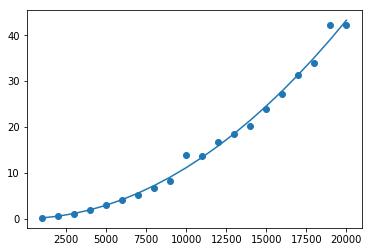

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ms = range(1000,21000,1000)
ts = [0.15,0.58,1.10,1.83,2.89,4.02,5.11,6.65,8.26,13.86,13.55,16.62,18.51,20.22,23.93,27.25,31.41,33.86,42.27,42.20]

q = np.polyfit(ms, ts, deg=2)
f = lambda x: q[0]*x**2 + q[1]*x + q[2]
plt.scatter(ms, ts)
plt.plot(ms, map(f, ms))
plt.show()

In [20]:
f(300000) / 3600.0 # 2.64hr

2.6359723571871596

In [33]:
f(100000) / 60.0 # 17.6min

17.64069466279334

In [28]:
# Preprocess first 300k word vectors, printing after 10k (should equate to every ~5.3min)
from collections import defaultdict

MAX_WORDS = 20000
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(REPO_HOME+'data/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=MAX_WORDS)

def preprocess_w2v_neighbors(model, k=10):
    neighbor_dict = defaultdict(list)
    start = time()
    for idx, g2 in enumerate(model.vocab.iterkeys()):
        for g1 in zip(*word2vec_model.most_similar(positive=[g2], topn=k))[0]:
            neighbor_dict[g1].append(g2)
        if (idx-1) % 10000 == 0:
            print 'Finished iteration {} after {:.2f}min'.format(idx, (time()-start)/60.0)    
    return neighbor_dict

res = preprocess_w2v_neighbors(word2vec_model)

Finished iteration 10000 after 0.33min


In [ ]:
from cpickle import dumps

In [29]:
res['elephant']

[u'zoo',
 u'snake',
 u'monkey',
 u'elephants',
 u'bear',
 u'Zoo',
 u'shark',
 u'tiger',
 u'lion']

In [30]:
res['dog']

[u'Dogs',
 u'vet',
 u'puppy',
 u'animal',
 u'snake',
 u'cage',
 u'monkey',
 u'dogs',
 u'cat',
 u'breeds',
 u'breed',
 u'cats',
 u'veterinarian',
 u'Animal',
 u'pets',
 u'companion',
 u'pet',
 u'stray',
 u'Pet',
 u'Dog',
 u'collar']

In [37]:
res['sung']

[u'chorus',
 u'sang',
 u'performed',
 u'singing',
 u'sings',
 u'lyrics',
 u'sing',
 u'national_anthem',
 u'rendition',
 u'song']

In [46]:
get_neighbors('elephant', k=50)

[(u'elephants', 15828),
 (u'rhino', 52754),
 (u'pachyderm', 152139),
 (u'tiger', 14452),
 (u'rhinoceros', 105016),
 (u'tigers', 22181),
 (u'hippo', 79047),
 (u'gorilla', 34353),
 (u'giraffe', 52851),
 (u'rhinos', 56577),
 (u'hippopotamus', 149954),
 (u'Bengal_tiger', 139590),
 (u'pachyderms', 155113),
 (u'orangutan', 85620),
 (u'lions', 23352),
 (u'tortoise', 52507),
 (u'monkey', 17100),
 (u'leopard', 44786),
 (u'tiger_cub', 244941),
 (u'chimp', 45993),
 (u'Elephant', 32140),
 (u'panda', 37720),
 (u'giraffes', 75837),
 (u'cheetah', 75380),
 (u'zebra', 57315),
 (u'chimpanzee', 48786),
 (u'lion', 14223),
 (u'antelope', 64903),
 (u'panther', 69433),
 (u'snake', 14786),
 (u'rabbit', 20336),
 (u'turtle', 24360),
 (u'ape', 42573),
 (u'orang_utan', 217042),
 (u'tusker', 274452),
 (u'gorillas', 45306),
 (u'tigress', 137635),
 (u'unicorn', 88174),
 (u'animal', 2801),
 (u'baboon', 103336),
 (u'leopards', 77113),
 (u'zoo', 9089),
 (u'monitor_lizard', 291708),
 (u'donkey', 30560),
 (u'goat', 20625

In [47]:
get_neighbors('rhino', k=50)

[(u'rhinos', 56577),
 (u'rhinoceros', 105016),
 (u'elephants', 15828),
 (u'elephant', 13033),
 (u'hippo', 79047),
 (u'tigers', 22181),
 (u'tiger', 14452),
 (u'antelope', 64903),
 (u'cheetah', 75380),
 (u'gorillas', 45306),
 (u'giraffe', 52851),
 (u'antelopes', 184139),
 (u'leopards', 77113),
 (u'Sumatran_tiger', 252783),
 (u'baboon', 103336),
 (u'lions', 23352),
 (u'impala', 272013),
 (u'panther', 69433),
 (u'gorilla', 34353),
 (u'tiger_cubs', 182681),
 (u'pachyderm', 152139),
 (u'jaguar', 82530),
 (u'cheetahs', 100999),
 (u'giraffes', 75837),
 (u'zoo', 9089),
 (u'mammal', 44077),
 (u'lion_cubs', 219935),
 (u'leopard', 44786),
 (u'mountain_gorilla', 283785),
 (u'tortoise', 52507),
 (u'hippos', 98453),
 (u'grizzly', 55011),
 (u'panda', 37720),
 (u'wildebeest', 150911),
 (u'orangutan', 85620),
 (u'cubs', 33932),
 (u'orang_utan', 217042),
 (u'zebra', 57315),
 (u'warthog', 245399),
 (u'tusker', 274452),
 (u'Bengal_tigers', 219435),
 (u'cub', 36516),
 (u'lioness', 128353),
 (u'grizzly_bear'

In [48]:
get_neighbors('miserable', k=50)

[(u'wretched', 36124),
 (u'dreadful', 17968),
 (u'horrid', 44710),
 (u'dismal', 10576),
 (u'woeful', 24783),
 (u'pitiful', 38439),
 (u'dreary', 30237),
 (u'abysmal', 28415),
 (u'horrible', 8002),
 (u'horrendous', 18350),
 (u'atrocious', 31557),
 (u'lousy', 20208),
 (u'terrible', 4906),
 (u'pathetic', 16576),
 (u'depressing', 17091),
 (u'misery', 12200),
 (u'crummy', 69716),
 (u'hopeless', 23496),
 (u'forgettable', 32199),
 (u'awful', 7276),
 (u'hellish', 54271),
 (u'mediocre', 14856),
 (u'abject', 60107),
 (u'disastrous', 9896),
 (u'nightmarish', 41069),
 (u'bleak', 12606),
 (u'listless', 41684),
 (u'putrid', 72413),
 (u'unfulfilling', 158531),
 (u'unbearable', 25553),
 (u'poor', 1268),
 (u'pitiable', 119441),
 (u'dispiriting', 70312),
 (u'nightmare', 8692),
 (u'miserably', 54331),
 (u'frustrating', 6410),
 (u'bad', 706),
 (u'gloomy', 17603),
 (u'disappointing', 3885),
 (u'appalling', 16157),
 (u'demoralizing', 40723),
 (u'joyless', 119655),
 (u'Miserable', 143245),
 (u'humiliating', 1

In [49]:
get_neighbors('svelte', k=50)

[(u'curvaceous', 93434),
 (u'slimline', 137124),
 (u'shapely', 98886),
 (u'curvier', 207198),
 (u'curvy', 50047),
 (u'lithe', 74528),
 (u'sleek', 15243),
 (u'skinny', 17678),
 (u'anorexic', 79787),
 (u'slimmer', 34114),
 (u'voluptuous', 72112),
 (u'petite', 36290),
 (u'physique', 38561),
 (u'slimmed_down', 49596),
 (u'flab', 105078),
 (u'ultra_slim', 107026),
 (u'sleeker', 66728),
 (u'portly', 74336),
 (u'skinnier', 117774),
 (u'bod', 123447),
 (u'##.#mm_thick', 290008),
 (u'statuesque', 103465),
 (u'plump', 41359),
 (u'diminutive', 27467),
 (u'demure', 66856),
 (u'stylish', 11684),
 (u'slender', 23902),
 (u'chubby', 47143),
 (u'buxom', 116296),
 (u'sexy', 9478),
 (u'noticeably_thinner', 298564),
 (u'hourglass_figure', 252808),
 (u'six_pack_abs', 168907),
 (u'willowy', 137854),
 (u'rotund', 95684),
 (u'looker', 131623),
 (u'flabby', 91331),
 (u'chunkier', 216239),
 (u'bootylicious', 291085),
 (u'leggy', 89317),
 (u'pudgy', 86481),
 (u'waif', 126098),
 (u'va_va_voom', 261907),
 (u'muscu

In [50]:
get_neighbors('obnoxious', k=50)

[(u'annoying', 12675),
 (u'irritating', 26180),
 (u'boorish', 90118),
 (u'uncouth', 114083),
 (u'insufferable', 82705),
 (u'rude', 16623),
 (u'moronic', 72903),
 (u'ill_mannered', 186136),
 (u'obnoxiously', 157923),
 (u'loathsome', 86930),
 (u'whiny', 68123),
 (u'vulgar', 28852),
 (u'idiotic', 37334),
 (u'asshole', 65501),
 (u'tactless', 175072),
 (u'inane', 54172),
 (u'egotistical', 71343),
 (u'arrogant', 15986),
 (u'loud_mouthed', 172413),
 (u'dopey', 92670),
 (u'foul_mouthed', 59406),
 (u'bratty', 117552),
 (u'loutish', 222499),
 (u'insolent', 141367),
 (u'mean_spirited', 41152),
 (u'overbearing', 43759),
 (u'whiney', 197491),
 (u'pompous', 53377),
 (u'condescending', 48784),
 (u'unfunny', 85877),
 (u'irksome', 100497),
 (u'snotty', 108949),
 (u'oafish', 248247),
 (u'inconsiderate', 72793),
 (u'goofy', 24445),
 (u'snide', 101655),
 (u'unlikable', 140284),
 (u'unlikeable', 243418),
 (u'politically_incorrect', 55996),
 (u'boor', 281923),
 (u'pushy', 59628),
 (u'dim_witted', 129466),
 